**연습 문제 1-2**

In [2]:
import numpy as np

def sub_self_norm(*elements):
    for i in elements:
        el_sum = + i ** 2
    return np.sqrt(el_sum)

# 벡터만 넣으면 원소 수를 알아서 받나?

In [15]:
# 정답

# the function
def normOfVect(v):
  return np.sqrt(np.sum(v**2))

# test it on a unit-norm vector
w = np.array([0,0,1])
print( normOfVect(w) )

# non-unit-norm vector, and confirm using np.linalg.norm
w = np.array([1,2,3])
print( normOfVect(w),np.linalg.norm(w) )

1.0
3.7416573867739413 3.7416573867739413


**연습 문제 1-5**

In [9]:
elemOFvec = []

while True:
    elem_input = input("행벡터의 원소 입력('*'을 눌러 멈춤)")
    if elem_input == '*':
        break
    else:
        elemOFvec.append(int(elem_input))

v = np.array(elemOFvec)
print(f'행벡터 v = {v}')

vt = np.zeros((1,len(v)))

for i in v:
# []로 감싸서 추가하면 저절로 열로 인식 못하나?
print(f'열벡터 vt = {vt}')

IndentationError: expected an indented block after 'for' statement on line 15 (<ipython-input-9-d40bb2febdb0>, line 17)

In [ ]:
# 정답

# the row vector to transpose
v = np.array([[1,2,3]])

# initialize the column vector
vt = np.zeros((3,1))

# direct implementation of the formula using a for loop
for i in range(v.shape[1]):
  vt[i,0] = v[0,i]

# confirm!
print(v), print(' ')
print(vt)

# Note about data types: The two vectors actually have different data types
#  (ints vs. floats). That happened because I defined v using ints while the default type
#  for np.zeros is float. You can match data types in several ways, including:
#  (1) write 3. instead of 3 when creating v; (2) use dtype=np.float as an optional input.

**연습 문제 1-6**

In [16]:
v1 = np.array([1,2,3])

print(np.dot(v1,v1))
print(np.linalg.norm(v1)**2)

14
14.0


In [14]:
# 정답

# some vector
c = np.random.randn(5)

# squared norm as dot product with itself
sqrNrm1 = np.dot(c,c)

# squared norm via our function from exercise 1
sqrNrm2 = normOfVect(c)**2

# print both to confirm they're the same
print( sqrNrm1 )
print( sqrNrm2 )

10.230966046564523
10.230966046564525


**연습 문제 1-7**

In [17]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])

print(np.dot(v1,v2))
print(np.dot(v2,v1))

print(1*4 + 2*5 + 3*6)
print(4*1 + 5*2 + 6*3)

32
32
32
32


In [22]:
v1 = np.random.randn(3,1)
v2 = np.random.randn(3,1)

print(np.dot(v1,v2))
print(np.dot(v2,v1))

print(sum(v1*v2))
print(sum(v2*v1))

ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [27]:
v1 = np.random.randn(1,3)
v2 = np.random.randn(1,3)

print(np.dot(v1,v2))
print(np.dot(v2,v1))

print(sum(v1*v2))
print(sum(v2*v1))

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [18]:
# 정답

# dimensionality
n = 11

# some random column vectors
a = np.random.randn(n,1)
b = np.random.randn(n,1)

# dot products both ways
atb = np.sum(a*b)
bta = np.sum(b*a)

# they're equal if their difference is 0
atb - bta

# For an extra challenge, see what happens when you use np.dot() to compute the dot products.

0.0

**연습 문제 1-9**

In [29]:
t = np.random.randn(2)
r = np.random.randn(2)

t_para = r * (np.dot(t,r)/np.dot(r,r))
t_vert = t - t_para

print(np.dot(t_para,t_vert)) # 직교한다면 내적 값이 0이어야 하는 거 아닌가?
print(np.dot(r,t_vert))

2.220446049250313e-16
4.440892098500626e-16


[0.69243113 0.03379787]
[0.69243113 0.03379787]
-1.3877787807814457e-17


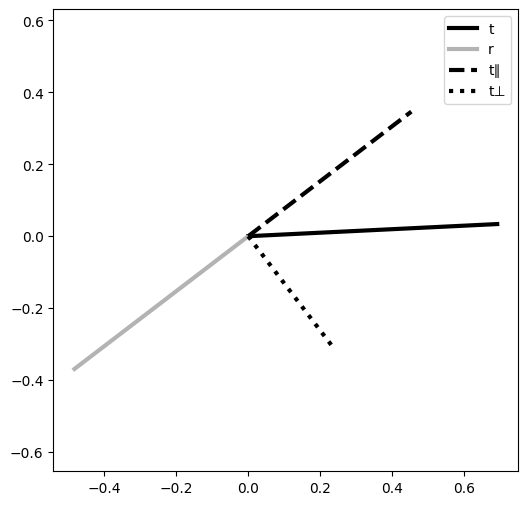

In [31]:
# 정답

# generate random R2 vectors (note: no orientation here! we don't need it for this exercise)
t = np.random.randn(2)
r = np.random.randn(2)

# the decomposition
t_para = r * (np.dot(t,r) / np.dot(r,r))
t_perp = t - t_para

# confirm that the two components sum to the target
print(t)
print( t_para+t_perp )

# confirm orthogonality (dot product must be zero!)
print( np.dot(t_para,t_perp) )
# Note about this result: Due to numerical precision errors,
#   you might get a result of something like 10^-17, which can be interpretd as zero.



# draw them!
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# draw main vectors
plt.plot([0,t[0]],[0,t[1]],color='k',linewidth=3,label=r't')
plt.plot([0,r[0]],[0,r[1]],color=[.7,.7,.7],linewidth=3,label=r'r')

# draw decomposed vector components
plt.plot([0,t_para[0]],[0,t_para[1]],'k--',linewidth=3,label=r't∥')
plt.plot([0,t_perp[0]],[0,t_perp[1]],'k:',linewidth=3,label=r't⊥')

plt.axis('equal')
plt.legend()
plt.savefig('Figure_01_08.png',dpi=300)
plt.show()